In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import copy

# Задание №1

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

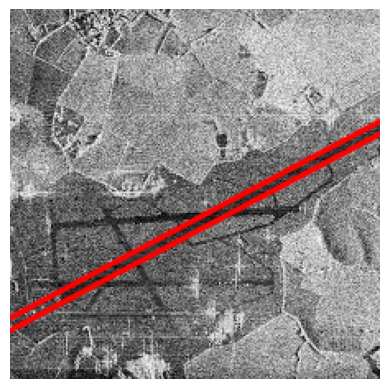

In [2]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

canny = cv2.Canny(image_gray, 150, 350, apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(image, cmap = 'gray')
plt.axis('off')

# Задание №2

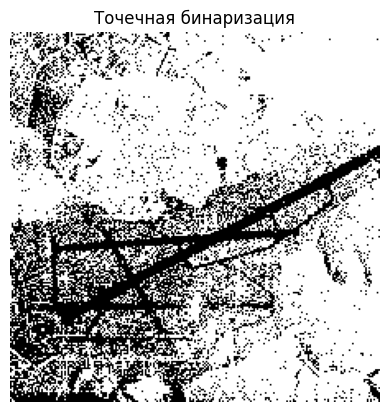

In [3]:
bin_img = copy.deepcopy(image_gray)
T = 100
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
plt.title('Точечная бинаризация')
plt.axis('off')
plt.imshow(bin_img, cmap='gray')

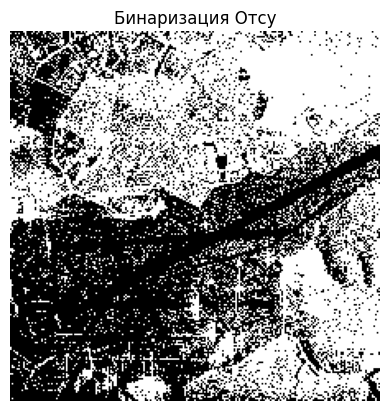

In [4]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Бинаризация Отсу')
plt.axis('off')
plt.imshow(th2, cmap='gray')

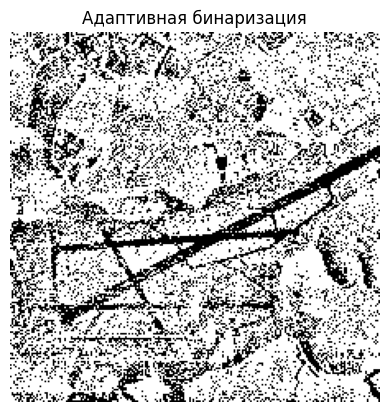

In [5]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.title('Адаптивная бинаризация')
plt.axis('off')
plt.imshow(th3, cmap='gray')

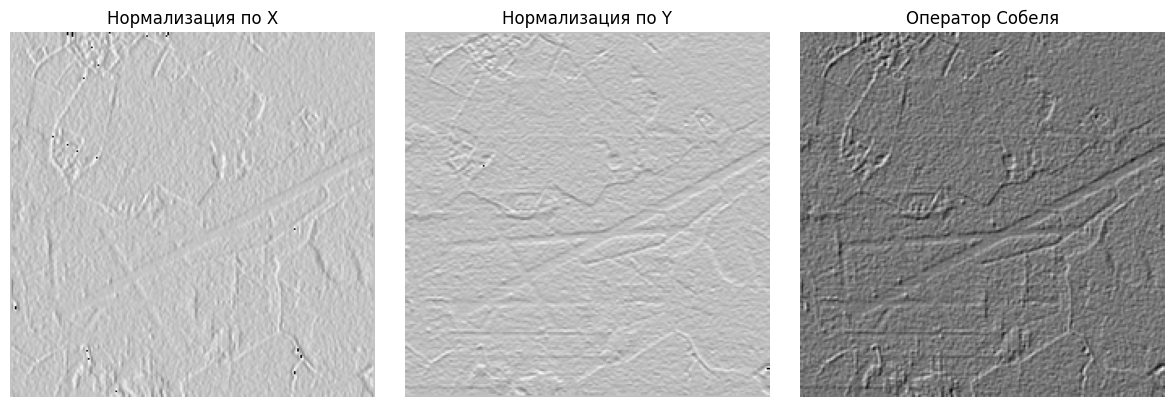

In [6]:
scale = 0.1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.title('Нормализация по X')
plt.axis('off')
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

plt.subplot(1, 3, 2)
plt.title('Нормализация по Y')
plt.axis('off')
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

plt.subplot(1, 3, 3)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between
plt.title('Оператор Собеля')
plt.axis('off')
plt.imshow((grad - grad.min())*255, cmap="gray")

plt.tight_layout()
plt.show()

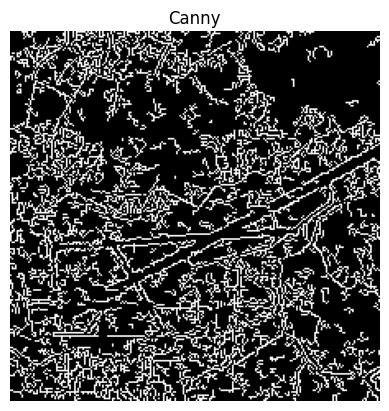

In [7]:
canny = cv2.Canny(image_gray, 150, 350, apertureSize = 3)
plt.title('Canny')
plt.axis('off')
plt.imshow(canny, cmap="gray")